In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('Datasets/PTEN_MCF10A_stability.csv', index_col=False)
df2 = pd.read_csv('Web Datasets/PTEN_SDM.csv', index_col=False)
df3 = pd.read_csv('Datasets/PTEN_MCF10A.csv', index_col=False)

In [3]:
print(df1.head(), '\n')
print(df2.head(), '\n')
print(df3.head())

  variant  stability  Std. Error
0     K6E     0.6576     0.08227
1     K6I     0.9293     0.25850
2    R15S     1.0280     0.25560
3    M35V     1.1120     0.07086
4    P38H     0.8563     0.11500 

  variant Mutation WT_SSE  WT_RSA (%)  WT_DEPTH (_)  WT_OSP  WT_SS  WT_SN  \
0     K6E      NaN    NaN         NaN           NaN     NaN    NaN    NaN   
1     K6I      NaN    NaN         NaN           NaN     NaN    NaN    NaN   
2    R15S     R15S      p        53.3           3.6    0.32  False  False   
3    M35V     M35V      E         0.0          10.8    0.53  False  False   
4    P38H     P38H      t         0.0          10.5    0.60  False  False   

   WT_SO MT_SSE  MT_RSA (%)  MT_DEPTH (_)  MT_OSP  MT_SS  MT_SN  MT_SO  \
0    NaN    NaN         NaN           NaN     NaN    NaN    NaN    NaN   
1    NaN    NaN         NaN           NaN     NaN    NaN    NaN    NaN   
2   True      b        52.3           3.6    0.37  False  False  False   
3  False      E         2.7          10.3

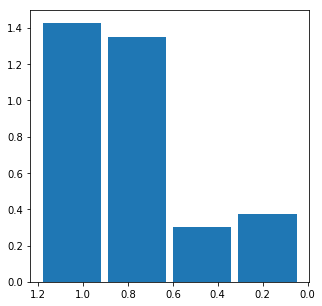

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plt.hist(df1['stability'], density=True, bins=4, rwidth=0.90)
ax.set_xlim(ax.get_xlim()[::-1])

# output fig
#mpl.rcParams['pdf.fonttype'] = 42
#plt.savefig('Output PDFs/MCF10A_stability_hist.pdf', transparent=True, dpi=200)

plt.show()

In [19]:
df_MCF10A = df3.merge(df1, on='variant')
df_MCF10A = df_MCF10A.dropna().reset_index(drop=True)

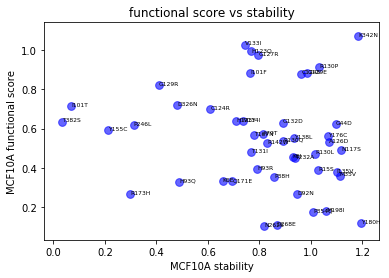

In [20]:
fig, ax = plt.subplots()

x = df_MCF10A['stability']
y = df_MCF10A['MCF10A score']

ax.scatter(x, y, alpha=0.6, s=60, c='b')
for i in range(len(df_MCF10A)): #plot each point + it's index as text above
    ax.text(x[i], y[i],  '%s' % (str(df_MCF10A.iloc[i,0])), size=6, color='k')
    
ax.set_xlabel('MCF10A stability')
ax.set_ylabel('MCF10A functional score')
ax.set_title('functional score vs stability')

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/MCF10A score vs stability.pdf', transparent=True, dpi=200)

plt.show()

In [21]:
# merging dfs

df_combined = df2.merge(df1, on='variant')
print(df_combined.head())

  variant Mutation WT_SSE  WT_RSA (%)  WT_DEPTH (_)  WT_OSP  WT_SS  WT_SN  \
0     K6E      NaN    NaN         NaN           NaN     NaN    NaN    NaN   
1     K6I      NaN    NaN         NaN           NaN     NaN    NaN    NaN   
2    R15S     R15S      p        53.3           3.6    0.32  False  False   
3    M35V     M35V      E         0.0          10.8    0.53  False  False   
4    P38H     P38H      t         0.0          10.5    0.60  False  False   

   WT_SO MT_SSE  MT_RSA (%)  MT_DEPTH (_)  MT_OSP  MT_SS  MT_SN  MT_SO  \
0    NaN    NaN         NaN           NaN     NaN    NaN    NaN    NaN   
1    NaN    NaN         NaN           NaN     NaN    NaN    NaN    NaN   
2   True      b        52.3           3.6    0.37  False  False  False   
3  False      E         2.7          10.3    0.50  False  False  False   
4  False      t         0.0          11.3    0.62   True  False  False   

   Predicted __G              Outcome  stability  Std. Error  
0            NaN             

In [24]:
# method 1 - MinMax scaling of data, ignore NaN values
data = df_combined.loc[:, ['Predicted __G', 'stability']]
for i in range(len(data.columns)):
    s = data.iloc[:,i]
    scaled = s.sub(s.min()).div((s.max() - s.min()))
    data[str(data.columns[i])] = scaled

data.iloc[:,0].replace(0, np.nan, inplace=True) # replace 0 with NaN
data.columns = ['SDM', 'stability']
data.insert(0, 'variant', df_combined['variant'])

# method 2 - use MinMaxScaler from sklearn, cannot process NaNs    
#from sklearn.preprocessing import MinMaxScaler

# remove NaN entries
#df_combined = df_combined.dropna().reset_index(drop=True)

#data = df_combined.loc[:, ['Predicted __G', 'stability']]
#data = pd.DataFrame(MinMaxScaler().fit_transform(data))
#data.columns = ['SDM', 'stability']
#data.insert(0, 'variant', df_combined['variant'])
print(data)

   variant       SDM  stability
0      K6E       NaN   0.537739
1      K6I       NaN   0.772323
2     R15S  0.485759   0.857540
3     M35V  0.731013   0.930065
4     P38H  0.759494   0.709295
5     G44D  0.148734   0.916251
6     A79T  0.613924   0.673982
7     D92N  0.604430   0.788209
8     H93Q  0.607595   0.392257
9     H93R  0.609177   0.652570
10   I101F  0.482595   0.629949
11   I101T  0.137658   0.029580
12   N117S  0.634494   0.934382
13   H123Y  0.613924   0.583240
14   H123Q  0.512658   0.633576
15   C124S  0.403481   0.800470
16   C124R  0.343354   0.495519
17   A126D  0.628165   0.893803
18   G127R  0.180380   0.657233
19   G129R  0.827532   0.323876
20   G129E  0.939873   0.821796
21   R130L  0.443038   0.848043
22   R130P       NaN   0.860994
23   R130Q  0.318038   0.740377
24   T131I  0.781646   0.632108
25   G132D  0.216772   0.739823
26   V133I  0.613924   0.612250
27   M134I  0.585443   0.604393
28   I135V  0.226266   0.919704
29   Y138L  0.674051   0.775259
30   R14

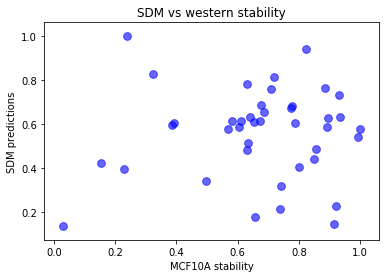

In [25]:
# plot scaled SDM vs MCF10A

fig = plt.figure()
ax = fig.add_subplot(111)

x = data['stability']
y = data['SDM']

ax.scatter(x, y, alpha=0.6, s=60, c='b')
        
ax.set_xlabel('MCF10A stability')
ax.set_ylabel('SDM predictions')
ax.set_title('SDM vs western stability')

plt.show()

In [12]:
# do Pearson correlation

def pearson(data1, data2):
    from scipy.stats import pearsonr
    corr = pearsonr(data1, data2)[0]
    p_val = pearsonr(data1, data2)[1]
    print('Correlation: {0:.4f}'.format(corr))
    print('Two Tailed P Value: {0:.4f}'.format(p_val))

In [11]:
print("Pearson correlation, SDM vs MCF10A:")
pearson(data['SDM'], data['stability'])

Pearson correlation, SDM vs MCF10A:
Correlation: 0.0206
Two Tailed P Value: 0.8970


In [73]:
# transposing dframe, prepare for plotting
data_T = data[['SDM', 'stability']].transpose()
data_T.columns = data['variant'].tolist()

print(data_T.head())

                K6E       K6I      R15S      M35V      P38H      G44D  \
SDM             NaN       NaN  0.485759  0.731013  0.759494  0.148734   
stability  0.537739  0.772323  0.857540  0.930065  0.709295  0.916251   

               A79T      D92N      H93Q      H93R  ...     Y180H     M198I  \
SDM        0.613924  0.604430  0.607595  0.609177  ...  0.577532  0.765823   
stability  0.673982  0.788209  0.392257  0.652570  ...  1.000000  0.884305   

              T232A     P246L     N262S     D268E     D326N     K342N  \
SDM        0.681962  1.000000  0.688291  0.814873  0.594937  0.542722   
stability  0.779058  0.239695  0.676832  0.718102  0.385782  0.992229   

              P354Q  T382S  
SDM             NaN    NaN  
stability  0.841136    NaN  

[2 rows x 46 columns]


In [49]:
data_T.index

Index(['SDM', 'stability'], dtype='object')

In [64]:
data.shape

(46, 3)

In [79]:
# now plot heatmap

# plot the data
fig, ax = plt.subplots(figsize=(7,5), dpi=200)
im = ax.imshow(data_T, cmap='viridis_r')
    
# set the ticks...
ax.set_xticks(np.arange(len(data_T.columns)))
ax.set_yticks(np.arange(2))
    
# label the ticks
ax.set_xticklabels(data_T.columns, fontsize=6, rotation=90)
ax.set_yticklabels(list(data_T.index), fontsize=6)
 
# set white grids
ax.set_xticks(np.arange(data.shape[0]+1)-0.5, minor=True)
#ax.set_yticks(np.arange(data.shape[1])-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=0.4)
ax.tick_params(which="minor", bottom=False, left=False)
    
# set the title
ax.set_title("MCF10A stability western vs SDM")

# add colorbar
cbar = ax.figure.colorbar(im, cax = fig.add_axes([0.92, 0.45, 0.01, 0.1]))
cbar.ax.tick_params(labelsize=6)

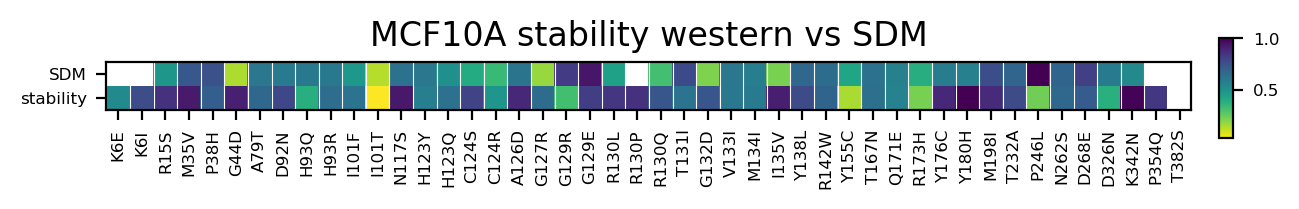

In [80]:
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/SDM vs MCF10A stability.pdf', transparent=True)

plt.show()

In [16]:
def scatter_plotting(x, y, x_label, y_label, df, title, ax=None, **kwargs):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    
    for i in range(len(df)): #plot each point + it's index as text above
        ax.text(x[i], y[i],  '%s' % (str(df.iloc[i,0])), size=6, color='k')
    
    ax.scatter(x, y, alpha=0.6, s=60, c='b', cmap='rainbow')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

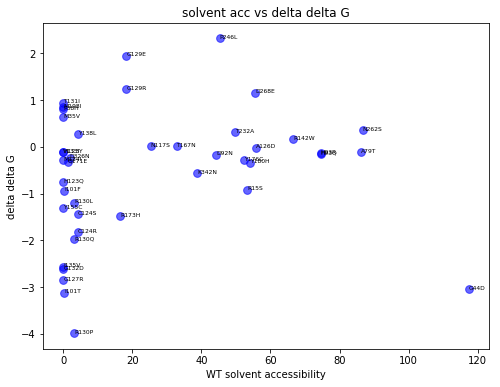

In [17]:
scatter_plotting(df_combined['WT_RSA (%)'], df_combined['Predicted __G'],
                'WT solvent accessibility', 'delta delta G', df_combined,
                 'solvent acc vs delta delta G')

plt.show()

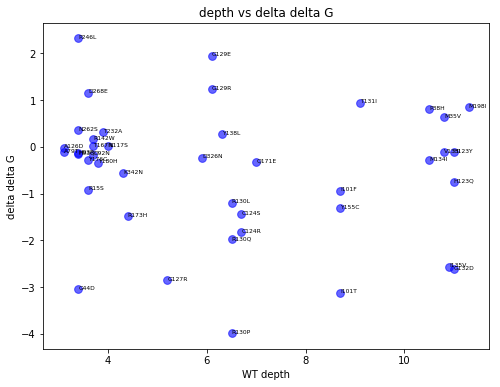

In [18]:
scatter_plotting(df_combined['WT_DEPTH (_)'], df_combined['Predicted __G'],
                'WT depth', 'delta delta G', df_combined,
                 'depth vs delta delta G')

plt.show()

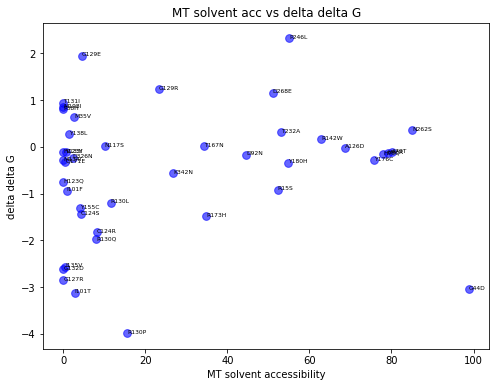

In [19]:
scatter_plotting(df_combined['MT_RSA (%)'], df_combined['Predicted __G'],
                'MT solvent accessibility', 'delta delta G', df_combined,
                 'MT solvent acc vs delta delta G')

plt.show()

# merging in HEK cell data

In [4]:
df_HEK = pd.read_csv('Datasets/GFP-PTEN_scores_for_Chris_Loewen.csv', index_col=False)

print(df_HEK.head())

  variant   i160914   i161110   i161118   i161129      mean
0    A79T  1.379716  0.965915  0.929327  1.481790  1.189187
1   C124S  1.289591  1.241250  1.060428  1.774735  1.341501
2   D268E  1.546750  0.974952  1.100685  1.766940  1.347332
3   P354Q  1.222541  0.979773  0.850247  0.975194  1.006938
4   G129R  0.339862  0.310451  0.165289  0.086631  0.225558


In [6]:
df_HEK['HEK_sem'] = df_HEK.iloc[:, 1:-1].sem(axis=1)
df_HEK.rename(index=str, columns={'mean':'HEK_mean'}, inplace=True)
print(df_HEK)

   variant   i160914   i161110   i161118   i161129  HEK_mean   HEK_sem
0     A79T  1.379716  0.965915  0.929327  1.481790  1.189187  0.109384
1    C124S  1.289591  1.241250  1.060428  1.774735  1.341501  0.118203
2    D268E  1.546750  0.974952  1.100685  1.766940  1.347332  0.144108
3    P354Q  1.222541  0.979773  0.850247  0.975194  1.006938  0.060325
4    G129R  0.339862  0.310451  0.165289  0.086631  0.225558  0.046479
5    G132D  0.190598  0.254016  0.115624  0.066045  0.156570  0.032035
6    I101T  0.070208  0.166608  0.077501  0.060275  0.093648  0.019036
7     P38H  0.409978  0.707159  0.588029  0.693435  0.599650  0.053134
8    T167N  0.807394  0.792811  0.548688  0.399496  0.637097  0.076654
9    Y176C  0.688925  0.880970  0.903159  0.627171  0.775056  0.053346
10   Y180H  0.876585  1.007871  0.701370  0.462821  0.762162  0.091314


In [10]:
df_stability_all = df1.merge(df_HEK[['variant','HEK_mean','HEK_sem']], 
                             on='variant', how='left')
df_stability_all.rename(index=str, 
                        columns={'stability':'western', 'Std. Error':'western_sem'},
                       inplace=True)
print(df_stability_all)

   variant   western  western_sem  HEK_mean   HEK_sem
0      K6E  0.657600      0.08227       NaN       NaN
1      K6I  0.929300      0.25850       NaN       NaN
2     R15S  1.028000      0.25560       NaN       NaN
3     M35V  1.112000      0.07086       NaN       NaN
4     P38H  0.856300      0.11500  0.599650  0.053134
5     G44D  1.096000      0.16480       NaN       NaN
6     A79T  0.815400      0.21640  1.189187  0.109384
7     D92N  0.947700      0.21650       NaN       NaN
8     H93Q  0.489100      0.15290       NaN       NaN
9     H93R  0.790600      0.09647       NaN       NaN
10   I101F  0.764400      0.24950       NaN       NaN
11   I101T  0.069040      0.05710  0.093648  0.019036
12   N117S  1.117000      0.03691       NaN       NaN
13   H123Y  0.710300      0.31080       NaN       NaN
14   H123Q  0.768600      0.18090       NaN       NaN
15   C124S  0.961900      0.13030  1.341501  0.118203
16   C124R  0.608700      0.12630       NaN       NaN
17   A126D  1.070000      0.

In [46]:
df_stability_all.to_csv('Output Datasets/Fowler stability.csv', index=False)

# Pearson's R

In [13]:
HEK = df_stability_all['HEK_mean'].dropna()
western = df_stability_all.dropna(subset=['HEK_mean'])['western']
print("Pearson correlation, HEK vs MCF10A:")
pearson(HEK, western)

Pearson correlation, HEK vs MCF10A:
Correlation: 0.5809
Two Tailed P Value: 0.0609


# now start plotting

In [17]:
df_stability_all.dropna(inplace=True)

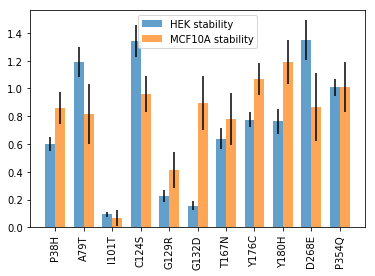

In [18]:
# matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
fig, ax = plt.subplots()
index = np.arange(len(df_stability_all))
bar_width =0.35

stab_1 = ax.bar(index, df_stability_all['HEK_mean'], bar_width, 
                yerr=df_stability_all['HEK_sem'], label='HEK stability',
                color='tab:blue', alpha=0.7)
stab_2 = ax.bar(index+bar_width, df_stability_all['western'], bar_width, 
                yerr=df_stability_all['western_sem'], label='MCF10A stability',
                color='tab:orange', alpha=0.7)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_stability_all['variant'], rotation=90)
ax.legend(loc='upper center')

#mpl.rcParams['pdf.fonttype'] = 42
#plt.savefig('Output PDFs/HEK_vs_MCF10A_stability.pdf', transparent=True)

plt.show()

In [34]:
print("Pearson correlation for individual stability vs western is:")
pearson(fowler_in['individual_stability'], fowler_in['stability'])

Pearson correlation for individual stability vs western is:
Correlation: 0.6832
Two Tailed P Value: 0.0205


In [84]:
# fowler_hi are vairants with high throughput stability measurements
fowler_hi = fowler_combined.dropna(subset=['high_throughput_stability']).reset_index(drop=True)
print(fowler_hi)

   variant  stability  Std. Error  high_throughput_stability  \
0      K6E     0.6576     0.08227                   1.392637   
1     R15S     1.0280     0.25560                   1.248020   
2     P38H     0.8563     0.11500                   0.908655   
3     G44D     1.0960     0.16480                   1.109932   
4     A79T     0.8154     0.21640                   1.216238   
5     H93R     0.7906     0.09647                   0.927602   
6    N117S     1.1170     0.03691                   1.200726   
7    C124S     0.9619     0.13030                   1.469114   
8    G129R     0.4099     0.13030                   0.371559   
9    G129E     0.9866     0.07512                   0.739353   
10   R130L     1.0170     0.06264                   1.250759   
11   M134I     0.7348     0.05757                   0.733609   
12   Q171E     0.6950     0.23270                   0.670218   
13   N262S     0.8187     0.03919                   0.856913   
14   P246L     0.3124     0.15090       

In [9]:
df_fowler_htp = df_fowler_htp[['variant', 'score', 'se']]

In [17]:
df1_htp_combined = df1.merge(df_fowler_htp, on = 'variant', how = 'left')

In [18]:
df1_htp_combined

,variant,stability,Std. Error,score,se
0,K6E,0.65760,0.082270,1.263799,0.148401
1,K6I,0.92930,0.258500,0.400211,0.101262
2,R15S,1.02800,0.255600,1.025132,0.108161
3,M35V,1.11200,0.070860,1.061209,0.036803
4,P38H,0.85630,0.115000,0.620798,0.109320
5,G44D,1.09600,0.164800,0.799232,0.077531
6,A79T,0.81540,0.216400,0.998154,0.082908
7,D92N,0.94770,0.216500,NaN,NaN
8,H93Q,0.48910,0.152900,NaN,NaN
9,H93R,0.79060,0.096470,0.816583,0.058123


In [19]:
df1_htp_combined.dropna(inplace=True)

In [21]:
df1_htp_combined.reset_index(drop=True)

,variant,stability,Std. Error,score,se
0,K6E,0.6576,0.08227,1.263799,0.148401
1,K6I,0.9293,0.25850,0.400211,0.101262
2,R15S,1.0280,0.25560,1.025132,0.108161
3,M35V,1.1120,0.07086,1.061209,0.036803
4,P38H,0.8563,0.11500,0.620798,0.109320
5,G44D,1.0960,0.16480,0.799232,0.077531
6,A79T,0.8154,0.21640,0.998154,0.082908
7,H93R,0.7906,0.09647,0.816583,0.058123
8,N117S,1.1170,0.03691,1.130212,0.041832
9,C124S,0.9619,0.13030,1.137468,0.105480


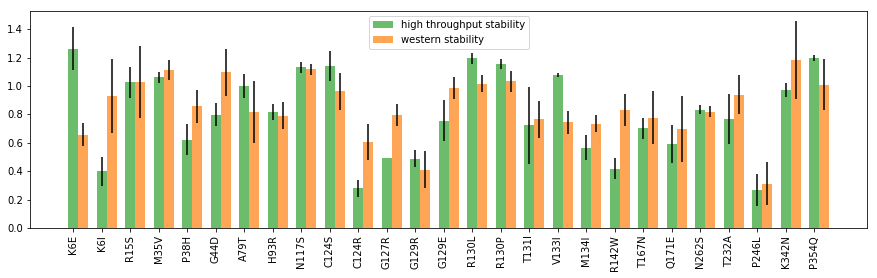

In [59]:
fig, ax = plt.subplots(figsize=(15,4))
index = np.arange(len(df1_htp_combined))
bar_width =0.35

stab_1 = ax.bar(index, df1_htp_combined['score'], bar_width, align='edge',
                yerr=df1_htp_combined['se'], label='high throughput stability',
                color='tab:green', alpha=0.7)

stab_2 = ax.bar(index+bar_width, df1_htp_combined['stability'], bar_width, align='edge',
                yerr=df1_htp_combined['Std. Error'], label='western stability',
               color='tab:orange', alpha=0.7)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df1_htp_combined['variant'], rotation=90)
ax.legend(loc='upper center')

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/Fowler high throughput stability.pdf', transparent=True)

plt.show()

In [61]:
print("Pearson correlation for htp vs western is:")
pearson(df1_htp_combined['score'], df1_htp_combined['stability'])

Pearson correlation for htp vs western is:
Correlation: 0.5931
Two Tailed P Value: 0.0011


In [2]:
g = lambda x: 3*x+1

In [3]:
g(2)

7

In [6]:
name = 'Douglas Adams'
print(name.split(" ")[-1].lower())

adams
